In [1]:
from readData import *
from Visualization import *
from FedAvg_CNN import iid_train_loader, noniid_train_loader
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# namelist = ["IID, C = 0.1, K = 100, E = 1",#0-#3. G1-G4
#             "IID, C = 0.2, K = 100, E = 1",
#             "IID, C = 0.5, K = 100, E = 1",
#             "IID, C = 1, K = 100, E = 1",

#             "IID, C = 0.1, K = 100, E = 10",#4-#7, G5-G8
#             "IID, C = 0.2, K = 100, E = 10",
#             "IID, C = 0.5, K = 100, E = 10",
#             "IID, C = 1, K = 100, E = 10", 

#             "IID, C = 0.1, K = 100, E = 20",#8-#11, G9-G12
#             "IID, C = 0.2, K = 100, E = 20",
#             "IID, C = 0.5, K = 100, E = 20",
#             "IID, C = 1, K = 100, E = 20",

#             "non-IID, C = 0.1, K = 100, E = 1", #16-#19, G17-G20
#             "non-IID, C = 0.2, K = 100, E = 1", 
#             "non-IID, C = 0.5, K = 100, E = 1", 
#             "non-IID, C = 1, K = 100, E = 1", 

#             "non-IID, C = 0.1, K = 100, E = 10", #20-#23, G21-G24
#             "non-IID, C = 0.2, K = 100, E = 10", 
#             "non-IID, C = 0.5, K = 100, E = 10", 
#             "non-IID, C = 1, K = 100, E = 10", 

#             "non-IID, C = 0.1, K = 100, E = 20", #12-#15, G13-G16
#             "non-IID, C = 0.2, K = 100, E = 20", 
#             "non-IID, C = 0.5, K = 100, E = 20", 
#             "non-IID, C = 1, K = 100, E = 20"]

# 0. Data Distribution among Clients

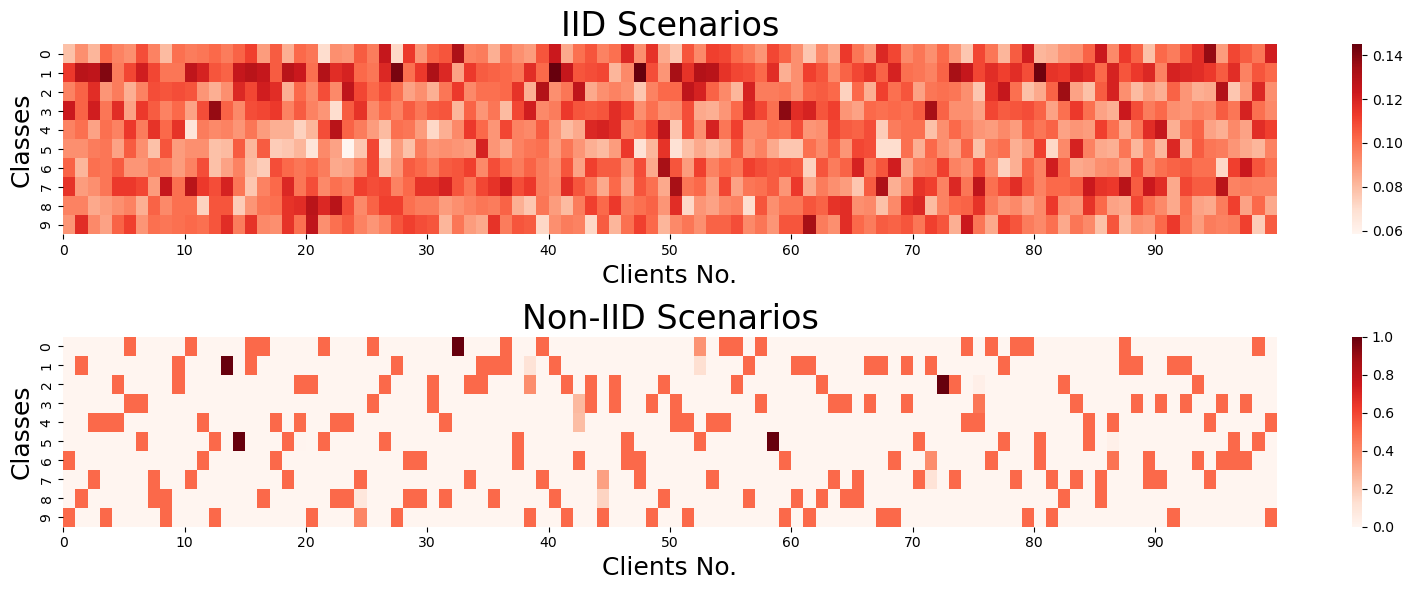

In [2]:
PlotDataDistribution(iid_train_loader, noniid_train_loader)

# 1. Accuracy Trend (VS Rounds)

In [ ]:
test_group = [i for i in range(1, 10)] + [i for i in range(10, 19)]
num_i = 9
num_n = 9

oaccs_i = [values[9 * i] for i in list(range(num_i))]
labels_i = [namelist[i] for i in list(range(num_i))]
oaccs_n = [values[9 * i] for i in list(range(num_i, num_i + num_n))]
labels_n = [namelist[i-1] for i in [i for i in range(10, 19)]]

PlotAcc(oaccs_i, labels = labels_i, iidno = 9, noniidno = 0)
PlotAcc(oaccs_n, labels = labels_n, iidno = 0, noniidno = 9)
PlotAcc(oaccs_i + oaccs_n, labels = labels_i + labels_n, iidno = 9, noniidno = 9)

In [ ]:
import matplotlib.pyplot as plt

iid_r = [315, 276, 323, 112, 97, 102, 114, 95, 93]
noniid_r = [771, 658, 680, 436, 289, 307, 368, 280, 256]
E1_i = iid_r[:3]
E10_i = iid_r[3:6]
E20_i = iid_r[6:]
E1_n = noniid_r[:3]
E10_n = noniid_r[3:6]
E20_n = noniid_r[6:]
C = [0.1, 0.5, 1]
# 
plt.figure(figsize=(4, 3))
plt.plot(C, E1_i, label='E=1', color='red')
plt.plot(C, E10_i, label='E=10', color='green')
plt.plot(C, E20_i, label='E=20', color='blue')

plt.text(C[1], E1_i[1], 'E=1', ha='left', va='top')
plt.text(C[2], E10_i[2], 'E=10', ha='right', va='bottom')
plt.text(C[2], E20_i[2], 'E=20', ha='right', va='top')

plt.xlabel('C')
plt.ylabel('Rounds')
plt.xticks(C, ['0.1', '0.5', '1'])
plt.title('IID')
plt.show()
# 
plt.figure(figsize=(4, 3))
plt.plot(C, E1_n, label='E=1', color='red')
plt.plot(C, E10_n, label='E=10', color='green')
plt.plot(C, E20_n, label='E=20', color='blue')

plt.text(C[1], E1_n[1], 'E=1', ha='left', va='top')
plt.text(C[0], E10_n[0], 'E=10', ha='left', va='bottom')
plt.text(C[0], E20_n[0], 'E=20', ha='left', va='top')

plt.xlabel('C')
plt.ylabel('Rounds')
plt.xticks(C, ['0.1', '0.5', '1'])
plt.title('Non-IID')
plt.show()
# 
plt.figure(figsize=(5, 3))
plt.plot(C, E1_i, label='E=1, IID', color='red')
plt.plot(C, E10_i, label='E=10, IID', color='green')
plt.plot(C, E20_i, label='E=20, IID', color='blue')
plt.plot(C, E1_n, label='E=1, NonIID', color='red', linestyle='--')
plt.plot(C, E10_n, label='E=10, NonIID', color='green', linestyle='--')
plt.plot(C, E20_n, label='E=20, NonIID', color='blue', linestyle='--')

plt.xlabel('C')
plt.ylabel('Rounds')
plt.xticks(C, ['0.1', '0.5', '1'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


# 2. Accuracy Trend (VS Epochs)

In [ ]:
indices2 = list(range(0, 2))
epochs = [1] * 4 + [10] * 4 + [20] * 4 + [1] * 4 + [10] * 4 + [20] * 4
oaccs = [values[9 * i] for i in indices2]
labels = [namelist[i] for i in indices2]

PlotAcc(oaccs, labels = labels, iidno = 2, noniidno = 0, epochs = epochs)

# 3. Entrophy VS Accuracy

In [ ]:
Entros = [values[5 + 9 * i] for i in range(num_i + num_n)]
binAccs = [values[1 + 9 * i] for i in range(num_i + num_n)]
counts = [values[8 + 9 * i] for i in range(num_i + num_n)]
labels = ["G" + str(i) + ", " + namelist[i - 1] for i in test_group]

for i in range(len(Entros)):

    PlotUncertaintyVSAcc(Entros[i], binAccs[i], labels[i], counts[i], binsize = 10)

# 4. Predicted Probability VS Accuracy

In [ ]:
pp = [values[2 + 9 * i] for i in range(num_i + num_n)]
binAccs = [values[1 + 9 * i] for i in range(num_i + num_n)]
counts = [values[8 + 9 * i] for i in range(num_i + num_n)]
labels = ["G" + str(i) + ", " + namelist[i - 1] for i in test_group]


for i in range(len(pp)):

    PlotPPVSAcc(pp[i], binAccs[i], labels[i], counts[i], binsize = 10)

In [ ]:
lastRoundpp = values[2]
lastRoundacc = values[1]
cmap = matplotlib.colormaps.get_cmap('brg')

first_acc = lastRoundacc[0]
first_pp = lastRoundpp[0]

middle_acc = lastRoundacc[len(lastRoundacc) // 2]
middle_pp = lastRoundpp[len(lastRoundpp) // 2]

last_acc = lastRoundacc[-1]
last_pp = lastRoundpp[-1]
print(len(last_acc))
print(len(last_pp))


plt.scatter(first_acc, first_pp, s = 1)
plt.plot([0, 1], [0, 1], color='black', linestyle=':')
plt.xlabel('first Round Accuracy')
plt.ylabel('first Round Prediction Probability')
plt.title('Scatter Plot of first Round Accuracy and Prediction Probability')
plt.show()

plt.scatter(middle_acc, middle_pp, s = 1)
plt.plot([0, 1], [0, 1], color='black', linestyle=':')
plt.xlabel('middle Round Accuracy')
plt.ylabel('middle Round Prediction Probability')
plt.title('Scatter Plot of middle Round Accuracy and Prediction Probability')
plt.show()


for i in range(len(last_acc)):
    color = cmap(i / (len(last_acc) - 1))
    plt.scatter(last_acc[i], last_pp[i], color = color, s = 3)
plt.plot([0, 1], [0, 1], color='black', linestyle=':')
plt.xlabel('Last Round Accuracy')
plt.ylabel('Last Round Prediction Probability')
plt.title('Scatter Plot of Last Round Accuracy and Prediction Probability')
plt.show()

# 5. ECE Score VS Overall Accuracy

In [ ]:
def PlotECEVSOAcc(values, indices, rounds):
    ecelist = [values[3 + 9 * (i - 1)] for i in indices]
    oacclist = [values[9 * (i - 1)] for i in indices]
    labels = ["G" + str(i) + ", " + namelist[i - 1] for i in indices]
    innerPlotECEVSOAcc(ecelist, oacclist, labels, rounds)

def innerPlotECEVSOAcc(ecelist, oacclist, labels, rounds):
    fig = plt.figure()
    gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])
    ax = plt.subplot(gs[0])
    cmap = matplotlib.colormaps.get_cmap('brg')
    
    
    for i in range(len(ecelist)):
        if len(ecelist[i]) > rounds:
            x1 = range(1, rounds + 1)
            y1 = ecelist[i][:rounds]
        else: 
            x1 = range(1, len(ecelist[i]) + 1)
            y1 = ecelist[i]
        ax.plot(x1, y1, color=cmap(i / (len(ecelist) - 1)), 
                linestyle=':', label=labels[i])
        
    ax.set_xlabel('Rounds')
    ax.set_ylabel('ECE Score')
    ax.set_ylim(0, 0.4)
    # ax.yaxis.label.set_color('blue')
    # ax.tick_params(axis='y', colors='blue')
    # ax.spines['left'].set_color('blue')
    # ax.spines['right'].set_color('red')
    
    ax2 = ax.twinx()
    for i in range(len(oacclist)):
        if len(oacclist[i]) > rounds:
            x2 = range(1, rounds + 1)
            y2 = oacclist[i][:rounds]
        else:
            x2 = range(1, len(oacclist[i]) + 1)
            y2 = oacclist[i]

        ax2.plot(x2, y2, color=cmap(i / (len(oacclist) - 1)), 
                linestyle='-', label=labels[i])
    ax2.set_ylabel('Accuracy')
    # ax2.yaxis.label.set_color('red')
    # ax2.tick_params(axis='y', colors='red')
    # ax2.spines['right'].set_color('red')
    # ax2.spines['left'].set_color('blue')
    ax2.set_ylim(0.8, 1)
    legend_ax = plt.subplot(gs[1])
    lines, labels = ax.get_legend_handles_labels()
    legend_ax.legend(lines, labels, loc='upper right', bbox_to_anchor=(-0.15, -0.15))
    legend_ax.axis('off')  
    fig.set_size_inches(8, 4)
    
    plt.show()

In [ ]:
iidindex1 = [1, 4, 7]
PlotECEVSOAcc(values, iidindex1, rounds = 100)
noniidindex = [11, 14, 17]
PlotECEVSOAcc(values, noniidindex, rounds = 100)
# You can select the group number in namelist to generate new graphs! 